# <center>Zadanie nr 1 - Algorytmy dopasowywania wzorców do tekstu</center>

In [1]:
from time import time
import matplotlib.pyplot as plt

## 0. Implementacja algorytmów

Funkcje zwracają listę poprawnych przesunięć.

#### algorytm naiwny

In [2]:
def naive(text, pattern):
    result = []

    pattern_length = len(pattern)
    text_length = len(text)

    for i in range(text_length - pattern_length + 1):
        if text[i:i + pattern_length] == pattern:
            result.append(i)

    return result

#### algorytm automatu skończonego

In [3]:
def finite_automaton(text, delta):
    result = []

    pattern_length = len(delta) - 1
    state = 0

    for i, char in enumerate(text):
        if char in delta[0]:
            state = delta[state][char]
            if state == pattern_length:
                result.append(i - pattern_length + 1)
        else:
            state = 0

    return result

In [4]:
def transition_table(pattern):
    result = []
    alphabet = set([c for c in pattern])
    
    for q in range(len(pattern) + 1):
        result.append({})
        
        for a in alphabet:
            k = min(len(pattern), q + 1)

            current_pattern = pattern[:q] + a
            
            while k > 0 and pattern[:k] != current_pattern[q - k + 1:]:
                k -= 1

            result[q][a] = k

    return result

#### algorytm Knutha-Morrisa-Pratta

In [5]:
def kmp(text, pattern, prefix_function):
    result = []
    
    pattern_length = len(pattern)
    text_length = len(text)

    pi = prefix_function
    q = 0

    for i in range(len(text)):
        while q > 0 and pattern[q] != text[i]:
            q = pi[q - 1]

        if pattern[q] == text[i]:
            q += 1

        if q == len(pattern):
            result.append(i + 1 - q)
            q = pi[q - 1]

    return result

In [6]:
def prefix_function(pattern):
    pi = [0]
    k = 0

    for q in range(1, len(pattern)):
        while k > 0 and pattern[k] != pattern[q]:
            k = pi[k - 1]

        if pattern[k] == pattern[q]:
            k += 1

        pi.append(k)

    return pi

## 1. Testy czasu działania algorytmów

* Zaimplementuj testy porównujące szybkość działania (osobno czas pre-processingu oraz czas dopasowania) wyżej wymienionych algorytmów.

In [7]:
def compare_time(text, pattern):
    
    # algorytm naiwny
    start = time()
    naive_result = naive(text, pattern)
    end = time()
    
    naive_time = end - start
    
    print(f'naive algorithm:\n\tpreprocessing: 0s\n\t     matching: {naive_time}s')
    
    # algorytm automatu skończonego
    preprocessing_start = time()
    delta = transition_table(pattern)
    preprocessing_end = time()
    
    automaton_pre_time = preprocessing_end - preprocessing_start
    
    start = time()
    automaton_result = finite_automaton(text, delta)
    end = time()
    automaton_time = end - start
    
    print(f'finite automaton algorithm:\n\tpreprocessing: {automaton_pre_time}s\n\t     matching: {automaton_time}s')
    
    # algorytm KMP
    preprocessing_start = time()
    prefix_func = prefix_function(pattern)
    preprocessing_end = time()
    kmp_pre_time = preprocessing_end - preprocessing_start
          
    start = time()
    kmp_result = kmp(text, pattern, prefix_func)
    end = time()
    kmp_time = end - start
    
    print(f'kmp algorithm:\n\tpreprocessing: {kmp_pre_time}s\n\t     matching: {kmp_time}s')
    
    # diagram słupkowy
    fig, ax = plt.subplots()
    x_axis = ["naive", "automaton", "kmp"]

    preprocessing_times = [0, automaton_pre_time, kmp_pre_time]
    ax.bar(x_axis, preprocessing_times)
    
    matching_times = [naive_time, automaton_time, kmp_time]
    ax.bar(x_axis, matching_times, bottom=preprocessing_times)
    
    ax.legend(labels=["preprocessing", "matching"])
    plt.show()

naive algorithm:
	preprocessing: 0s
	     matching: 8.344650268554688e-06s
finite automaton algorithm:
	preprocessing: 3.24249267578125e-05s
	     matching: 8.344650268554688e-06s
kmp algorithm:
	preprocessing: 5.4836273193359375e-06s
	     matching: 9.775161743164062e-06s


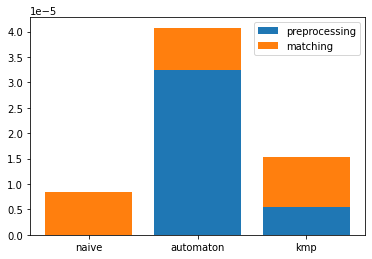

In [8]:
compare_time("abcabcabbabc", "abc")

## 2. Przykład działania programu - wyszukanie wzorca "art" w ustawie

* Znajdź wszystkie wystąpienia wzorca "art" w załączonej ustawie, za pomocą każdego algorytmu.

In [9]:
with open("ustawa.txt", "r") as file:
    text = "".join(file)
    
print(len(naive(text, "art")))
print(len(finite_automaton(text, transition_table("art"))))
print(len(kmp(text, "art", prefix_function("art"))))

273
273
273


Wszystkie trzy algorytmy poprawnie odnalazały wszystkie wystąpienia wzorca "art" w załączonej ustawie.

## 3. Porównanie czasu działania algorytmów w punkcie 2.

* Porównaj szybkość działania algorytmów dla problemu z p. 2.

naive algorithm:
	preprocessing: 0s
	     matching: 0.03664755821228027s
finite automaton algorithm:
	preprocessing: 1.7881393432617188e-05s
	     matching: 0.014523029327392578s
kmp algorithm:
	preprocessing: 5.4836273193359375e-06s
	     matching: 0.022025108337402344s


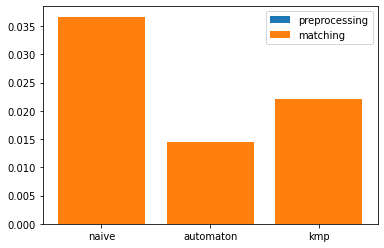

In [11]:
compare_time(text, "art")

Najwolniejszy okazał się algorytm naiwny. Lepiej poradziły sobie pozostałe dwa algorytmy, z których najmniejszy czas uzyskał algorytm automatu skończonego. Różnica w czasach jest jednak niewielka, co wynika z małej długości wzorca. Z tego powodu również czas preprocessingu jest zaniedbywalnie mały.

## 4. Niekorzystność algorytmu naiwnego - przykład

* Zaproponuj tekst oraz wzorzec, dla którego zmierzony czas działania algorytmów (uwzględniający tylko dopasowanie, bez pre-processingu) automatu skończonego oraz KMP będzie co najmniej 5-krotnie krótszy niż dla algorytmu naiwnego.

naive algorithm:
	preprocessing: 0s
	     matching: 3.0433154106140137s
finite automaton algorithm:
	preprocessing: 0.30975818634033203s
	     matching: 0.15352797508239746s
kmp algorithm:
	preprocessing: 0.013246536254882812s
	     matching: 0.26661086082458496s


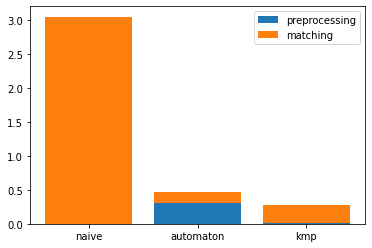

In [12]:
compare_time(text='A'*1_000_000+'B', pattern='A'*100_000)

<p style="text-align: justify">Złożoność algorytmu naiwnego to O(m*n), gdzie m - długość wzorca, a n - długość tekstu; natomiast złożoność dopasowywania w przypadku pozostałych dwóch to O(n). W związku z tym, im dłuższy wzorzec, tym większa przewaga algorytmów o złożoności O(n) w sytuacji niekorzystnej dla algorytmu naiwnego. Tak jak w wybranym przykładzie, algorytm naiwny dla każdego przesunięcia będzie porównywał wszystkie znaki wzorca, natomiast pozostałe algorytmy, dzięki utworzonym strukturom, nie będą musiały się cofać. </p>

## 5. Czasy preprocessingu - przykład

* Zaproponuj wzorzec, dla którego zmierzony czas obliczenia tablicy przejścia automatu skończonego będzie co najmniej 5-krotnie dłuższy niż czas potrzebny na utworzenie funkcji przejścia w algorytmie KMP.

naive algorithm:
	preprocessing: 0s
	     matching: 6.67572021484375e-06s
finite automaton algorithm:
	preprocessing: 20.81950616836548s
	     matching: 8.344650268554688e-06s
kmp algorithm:
	preprocessing: 0.00031304359436035156s
	     matching: 3.337860107421875e-06s


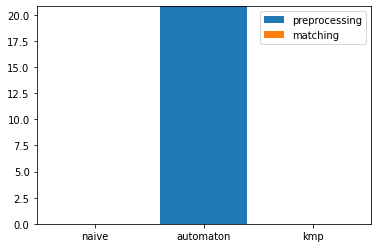

In [13]:
compare_time("a", "abcdefghijklmnopqrstuvwxyz"*100)

<p style="text-align: justify">Złożoność funkcji generującej tablicę przejścia dla algorytmu automatu skończonego w uzytej implementacji to O(m<sup>3</sup>|Σ|), gdzie Σ to liczebność alfabetu (w alfabecie uwzględnione są tylko symbole występujące we wzorcu). Natomiast, koszt obliczeniowy tablicy prefiksów dla algorytmu KMP to O(m). W większości przypadków czas wykonania pierwszej z tych funkcji był dużo większy, w szczególności dla powyższej sytuacji, czyli dla dużej liczby różnych znaków we wzorcu i dużej długości wzorca.</p>

## 6.  Wnioski

* Dla małej długości wzorca wszystkie trzy algorytmy znajdują wystąpienia w podobnym czasie, jednak algorytm naiwny na ogół wypada najgorzej.
* Dla długiego wzorca bardziej skomplikowane algorytmy dają dużo krótszy czas wyszukiwania, lecz czas preprocessingu jest znaczący.
* Czas preprocessingu dla algorytmu automatu skończonego jest często dużo większy niż ten dla algorytmu KMP oraz wymaga większych zasobów pamięci.

Marcin Hawryluk, 19.03.2021